# <center> Análise de dados - parte 2 </center>

Este notebook utilizará o dataset Sandstone, disponibilizado pela Elsevier, utilizado no livro  <a href="https://booksite.elsevier.com/9780444537966/?ISBN=9780444537966">Physical Properties of Rocks</a>, exemplo do livro texto de Darling (2005) para demonstrar análises de testemunho e de log.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_excel('sandstone.xlsx')
df.head()

,DEPTH,GR,RHOB,NPHI,RES-DEEP
0,616.001,104.638,2.663,0.129,19.841
1,616.153,102.528,2.654,0.131,20.287
2,616.306,99.254,2.634,0.128,20.183
3,616.458,97.172,2.648,0.124,19.741
4,616.610,95.056,2.664,0.118,19.241


#### Descrição das colunas

DEPTH - Profundidade (m)

GR - Contagem de raios gama (API)

RHOB - Densidade (g/cm$^3$)

NPHI - Porosidade neutrônica (adimensional)

RES-DEEP - Resistividade deep ($\Omega \cdot$m)

Primeiro, analisemos a descrição estatística do dado disponibilizado

In [33]:
df.describe()

,DEPTH,GR,RHOB,NPHI,RES-DEEP
count,224.000000,224.000000,224.000000,224.000000,224.000000
mean,632.993402,45.267643,2.497451,0.087589,11.981152
std,9.876649,23.289131,0.101690,0.029154,8.417610
min,616.001000,22.451000,2.350000,0.034000,0.801000
25%,624.497000,30.345500,2.403000,0.062000,2.724500
50%,632.993500,34.018500,2.484500,0.094500,13.240000
75%,641.490000,48.438250,2.574250,0.110000,18.669750
max,649.986000,104.638000,2.742000,0.159000,35.857000


Plotemos os perfis geofísicos

In [55]:
cols = ['GR','RES-DEEP','RHOB','NPHI']
unit = ['API','$\Omega \cdot$m','g/cm$^3$','']

/home/alexsandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


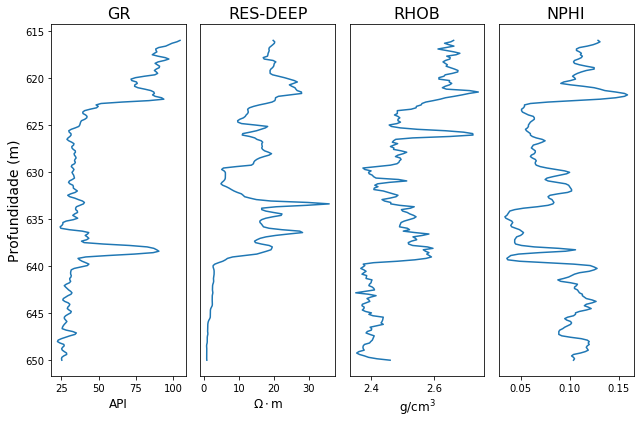

In [64]:
fig,axes = plt.subplots(ncols=4,figsize=(9,6))

aux=0

for ax,c,u in zip(axes,cols,unit):
    ax.set_title(c,fontsize=16)
    ax.set_xlabel(u,fontsize=12)
    ax.invert_yaxis()
    ax.plot(df[c],df.DEPTH)
    if (aux>0):
        ax.set_yticks([])
    else:
        ax.set_ylabel('Profundidade (m)',fontsize=14)
    aux+=1

fig.tight_layout()

fig.savefig('darling-plot.png',dpi=250)

fig.show()

### Gráfico de Dispersão

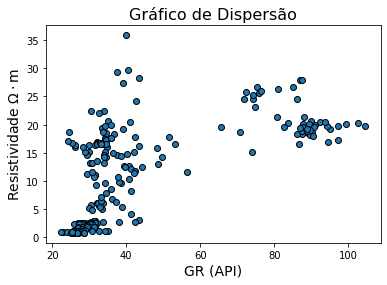

In [75]:
plt.scatter(df['GR'],df['RES-DEEP'],edgecolor='black')
plt.title('Gráfico de Dispersão',fontsize=16)
plt.xlabel('GR (API)',fontsize=14)
plt.ylabel('Resistividade $\Omega \cdot$m',fontsize=14)
plt.savefig('grafico-dispersão.png',dpi=250)

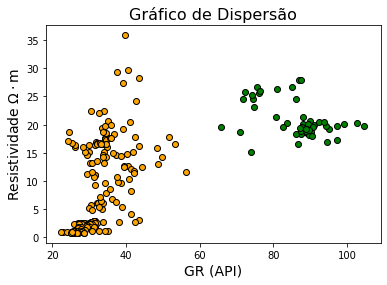

In [76]:
plt.scatter(df[df.GR<60]['GR'],df[df.GR<60]['RES-DEEP'],
            c='orange',edgecolor='black',label='GR < 60')

plt.scatter(df[df.GR>60]['GR'],df[df.GR>60]['RES-DEEP'],
            c='green',edgecolor='black',label='GR > 60')

plt.title('Gráfico de Dispersão',fontsize=16)
plt.xlabel('GR (API)',fontsize=14)
plt.ylabel('Resistividade $\Omega \cdot$m',fontsize=14)
plt.savefig('grafico-dispersão-2.png',dpi=250)

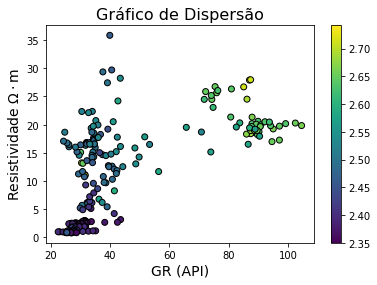

In [105]:
plt.scatter(df['GR'],df['RES-DEEP'],edgecolor='black',c=df.RHOB)

plt.colorbar()

plt.title('Gráfico de Dispersão',fontsize=16)
plt.xlabel('GR (API)',fontsize=14)
plt.ylabel('Resistividade $\Omega \cdot$m',fontsize=14)
plt.savefig('grafico-dispersão.png',dpi=250)

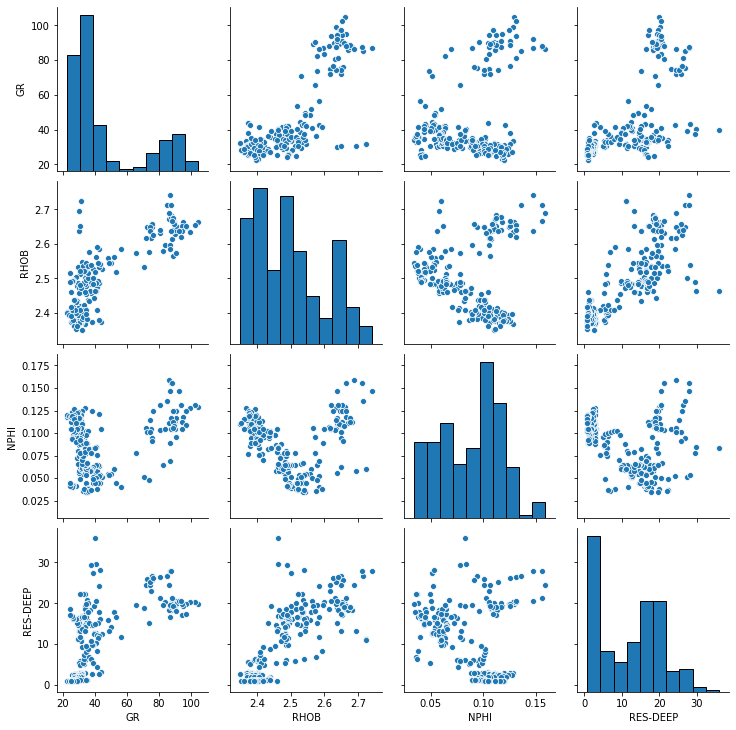

In [91]:
fig = sns.pairplot(df,vars=df.columns[1:],
             diag_kws={'edgecolor':'black'})
fig.savefig('pairplot.png',dpi=300)

### Obtendo a matriz de covariância

In [93]:
df.cov()

,DEPTH,GR,RHOB,NPHI,RES-DEEP
DEPTH,97.548192,-158.424375,-0.775562,0.010146,-61.649675
GR,-158.424375,542.383635,1.891249,0.240417,122.928926
RHOB,-0.775562,1.891249,0.010341,-0.000089,0.672965
NPHI,0.010146,0.240417,-0.000089,0.000850,-0.054153
RES-DEEP,-61.649675,122.928926,0.672965,-0.054153,70.856159


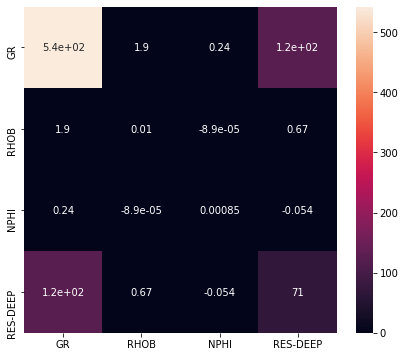

In [101]:
fig,axes = plt.subplots(figsize=(7,6))
sns.heatmap(df[df.columns[1:]].cov(),ax=axes,annot=True)

### Obtendo a matriz de correlação

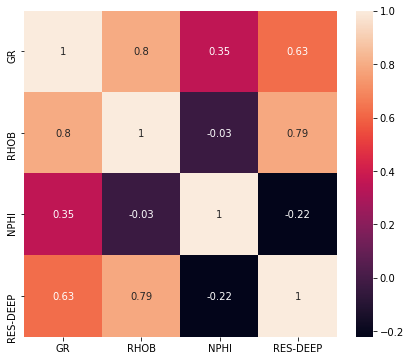

In [100]:
fig,axes = plt.subplots(figsize=(7,6))
sns.heatmap(df[df.columns[1:]].corr(),ax=axes,annot=True)